# Examples
### 1
Apply a production to a graph.

frozenset({Edge(type=EdgeType.E, vertices=frozenset({'D', 'C'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'B', 'A', 'D', 'C'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'A'}), parameters={})})


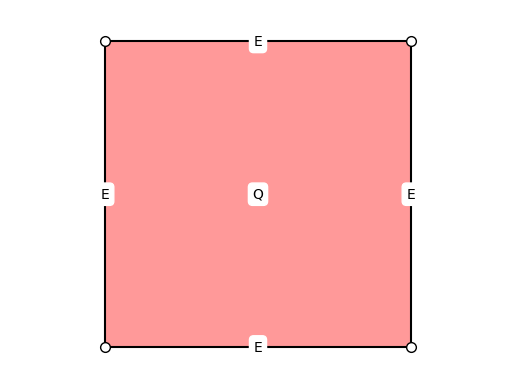

In [1]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0

hg = Hypergraph()
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})

prod0 = Prod0()
new_hg = prod0.apply(hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

### 2
Create a criterion to choose an edge to which a production should be applied.

frozenset({Edge(type=EdgeType.E, vertices=frozenset({'D', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'C'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'B', 'A', 'D', 'C'}), parameters={'R': 0}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'A'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'C'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'F'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'C', 'E', 'D', 'F'}), parameters={'R': 1})})
Production could not be applied.


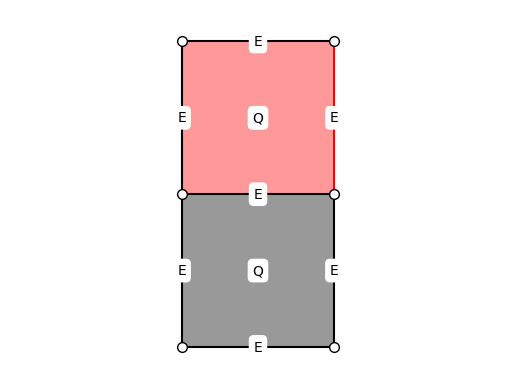

In [2]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0
from typing import Any, Mapping, Optional, List
from shapely.geometry import Point, MultiPoint


# create an rfc to stop applying the production to random edges
class BlockingRFC:
    def is_valid(
        self,
        edge: Edge,
        hypergraph: Hypergraph,
        meta: Optional[Mapping[str, Any]] = None,
    ) -> bool:
        return False


# create an rfc for a production applying only for specified edge
class EdgeRFC:

    def __init__(self, edge: Edge):
        self._edge = edge

    def is_valid(
        self,
        edge: Edge,
        hypergraph: Hypergraph,
        meta: Optional[Mapping[str, Any]] = None,
    ) -> bool:
        return self._edge == edge


hg = Hypergraph(rfc=BlockingRFC())
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.add_edge(Edge(EdgeType.E, frozenset({"C", "E"}), {"R": 1}))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "F"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"E", "F"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})
hg.set_vertex_parameter("E", {"x": 1, "y": 2})
hg.set_vertex_parameter("F", {"x": 0, "y": 2})

# apply rfc to specified edge
prod0 = Prod0(rfc=EdgeRFC(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0})))
new_hg = prod0.apply(hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# try applying the production again
new_hg = prod0.apply(new_hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# the second production will not be applied because of the BlockingRFC

### 3
Creating a criterion using parameters to decide which edge the production should be applied to.
The criterion is that if a point is inside a polygon defined by the hyperedge Q than that edge is refined.

frozenset({Edge(type=EdgeType.E, vertices=frozenset({'D', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'C'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'B', 'A', 'D', 'C'}), parameters={'R': 0}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'A'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'F'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'C', 'E', 'D', 'F'}), parameters={'R': 1})})
Production could not be applied.


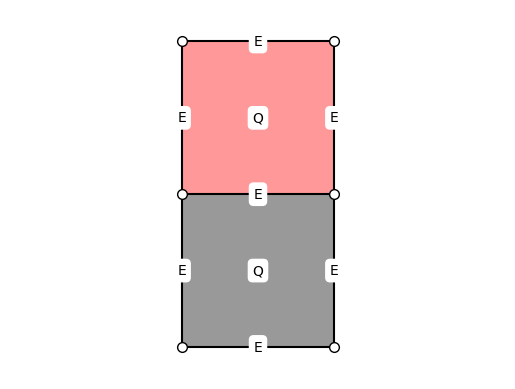

In [3]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0
from typing import Any, Mapping, Optional, List
from shapely.geometry import Point, MultiPoint


class CustomRFC:

    def __init__(self, points: List[Point]):
        self._points = points

    def is_valid(
        self,
        edge: Edge,
        hypergraph: Hypergraph,
        meta: Optional[Mapping[str, Any]] = None,
    ) -> bool:

        if not self._points:
            return False

        params = map(lambda v: hypergraph.get_vertex_parameters(v), edge.get_vertices())
        polygon_points = list(map(lambda p: Point(p["x"], p["y"]), params))

        polygon = MultiPoint(polygon_points).convex_hull
        res = polygon.contains(self._points[-1])

        if res:
            self._points.pop()
            return True

        return False


hg = Hypergraph(rfc=CustomRFC([Point(0.5, 1.5), Point(0.5, 1.5)]))
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.add_edge(Edge(EdgeType.E, frozenset({"C", "E"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "F"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"E", "F"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})
hg.set_vertex_parameter("E", {"x": 1, "y": 2})
hg.set_vertex_parameter("F", {"x": 0, "y": 2})

# apply prod0 anch check if the proper edge was refined
prod0 = Prod0()
hg = prod0.apply(hg)
if hg:
    print(hg.get_edges())
    hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# check whether the production is not applied again
prod0 = Prod0()
hg = prod0.apply(hg)
if hg:
    print(hg.get_edges())
    hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")